# Loading Data

In [1]:
import pandas as pd
data = pd.read_csv("zillow_data.csv")
data.head()

,name,street,city,state,postalCode,floorSize,price,type_of_house,property_type,no_of_days,url
0,"39507 Ross Cmn, Fremont, CA 94538",39507 Ross Cmn,Fremont,CA,94538,900,"$2,345/mo",2 bds2 ba900 sqft,Apartment for rent,25 minutes ago,https://www.zillow.com/homedetails/39507-Ross-...
1,"40660 Fremont Blvd, Fremont, CA 94538",40660 Fremont Blvd,Fremont,CA,94538,"2,126","$3,990/mo","3 bds3 ba2,126 sqft",House for rent,57 minutes ago,https://www.zillow.com/homedetails/40660-Fremo...
2,"33208 Lake Superior Ct, Fremont, CA 94555",33208 Lake Superior Ct,Fremont,CA,94555,"1,594","$3,500/mo","3 bds2 ba1,594 sqft",House for rent,9 hours ago,https://www.zillow.com/homedetails/33208-Lake-...
3,"3658 Capitol Ave #316a, Fremont, CA 94538",3658 Capitol Ave #316A,Fremont,CA,94538,"1,350","$3,650/mo","2 bds2.5 ba1,350 sqft",Apartment for rent,13 hours ago,https://www.zillow.com/homedetails/3658-Capito...
4,"41496 Timber Creek Ter, Fremont, CA 94539",41496 Timber Creek Ter,Fremont,CA,94539,"1,620","$3,350/mo","3 bds2.5 ba1,620 sqft",Townhouse for rent,15 hours ago,https://www.zillow.com/homedetails/41496-Timbe...


In [2]:
# Data Formatting
data['corrected_price']=data['price'].str.replace('/mo','').str.replace('$','').str.replace(',','')
data['corrected_price'] = pd.to_numeric(data['corrected_price'], errors='coerce')
data['beds'] = data['type_of_house'].str.extract(r'([0-9]+?) bd*').astype(int)
data['bath'] = data['type_of_house'].str.extract(r'([0-9]+?) ba').astype(int)
data['new_floor_size'] = data['type_of_house'].str.extract(r'([0-9,]+?) sqft')
data['new_floor_size'] = data['new_floor_size'].str.replace(',','').astype(float)


In [3]:
# Data Formatting for No. of days column
from re import findall
import re
def Clean_days(days): 
    if re.search(r'([0-9]+?) hour*',str(days)): 
        pos=1
        return pos 
    elif re.search(r'([0-9]+?) minutes*',str(days)): 
        pos = re.search(r'([0-9]+?) minutes*',days)
        pos=1
        return pos 
    elif re.search(r'([0-9]+?) day*',str(days)):
        pos=re.findall(r'([0-9]+?) day*',(days))
        return pos[0]
# Applying Clean_days function to the column no. of days
data['listed_days'] = data['no_of_days'].apply(Clean_days)

# Changing data type to Numeric
data['listed_days'] = pd.to_numeric(data['listed_days'], errors='coerce')


### Data validation

In [4]:
# Removing previous old columns
cols_to_drop=['price', 'type_of_house','floorSize','no_of_days']
new_data=data.drop(cols_to_drop, axis=1)
# New Data
new_data.head()
# Checking Data type
new_data.dtypes
# Summary of Numeric Data
numeric_data = data[['corrected_price','new_floor_size','beds','bath','listed_days']]
numeric_data.describe()


,corrected_price,new_floor_size,beds,bath,listed_days
count,558.000000,538.000000,565.000000,565.000000,544.000000
mean,3520.243728,1424.408922,2.348673,2.325664,58.000000
std,1946.808048,1460.520945,1.088554,1.525247,69.498705
min,1450.000000,200.000000,1.000000,1.000000,1.000000
25%,2399.250000,843.000000,1.000000,1.000000,4.000000
50%,3225.000000,1200.000000,2.000000,2.000000,33.000000
75%,4000.000000,1594.000000,3.000000,3.000000,90.000000
max,27500.000000,20944.000000,8.000000,6.000000,464.000000


# Missing Data

In [5]:
# Missing sqft data
new_data.isnull().sum()

name                0
street              0
city                0
state               0
postalCode          0
property_type       0
url                 0
corrected_price     7
beds                0
bath                0
new_floor_size     27
listed_days        21
dtype: int64

In [6]:
#Replace missing values with mean value
new_data['new_floor_size'].fillna((new_data['new_floor_size'].mean()), inplace=True)
new_data['corrected_price'].fillna((new_data['corrected_price'].mean()), inplace=True)
new_data.loc[:,['listed_days']] = new_data.loc[:,['listed_days']].ffill()
new_data.isnull().sum()

name               0
street             0
city               0
state              0
postalCode         0
property_type      0
url                0
corrected_price    0
beds               0
bath               0
new_floor_size     0
listed_days        0
dtype: int64

In [7]:
# Adding new column in dataset which shows "Price/SqFt"
new_data['ppsf'] = new_data['corrected_price']/ new_data['new_floor_size']
new_data['ppsf']

0      2.605556
1      1.876764
2      2.195734
3      2.703704
4      2.067901
         ...   
560    4.024194
561    3.055556
562    3.438530
563    2.857143
564    2.866667
Name: ppsf, Length: 565, dtype: float64

In [8]:
# Checking the length of New_Data
len(new_data)

565

## Exploratory Data Analysis

### Corrleation 

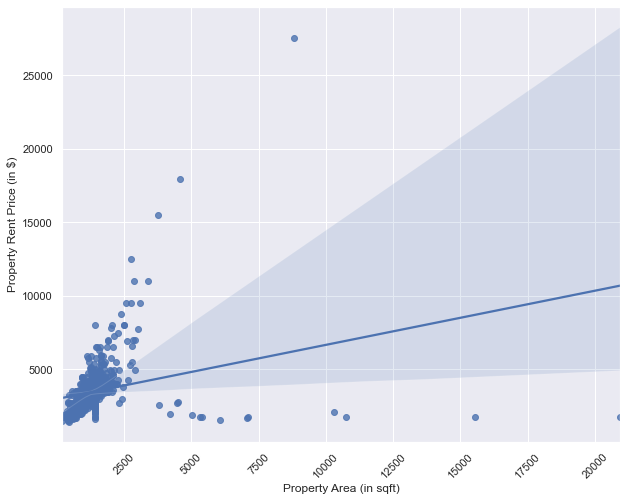

In [9]:
#Price with sqft
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

p = sns.set(rc={'figure.figsize':(10, 8)})
p = sns.regplot(x='new_floor_size',y='corrected_price',data=new_data)
plt.xticks(rotation=45)
plt.ylabel("Property Rent Price (in $)")
plt.xlabel("Property Area (in sqft)")

fig = p.get_figure()
#fig.savefig("correlation_price_sqft.jpg")

plt.show()

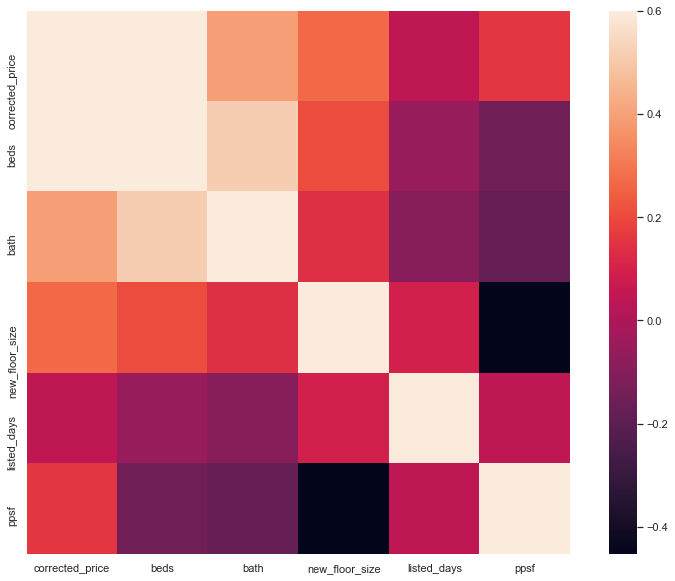

,corrected_price,beds,bath,new_floor_size,listed_days,ppsf
corrected_price,1.000000,0.698478,0.391500,0.270916,0.043012,0.156863
beds,0.698478,1.000000,0.516697,0.206234,-0.050820,-0.152555
bath,0.391500,0.516697,1.000000,0.143369,-0.092197,-0.175962
new_floor_size,0.270916,0.206234,0.143369,1.000000,0.096380,-0.452972
listed_days,0.043012,-0.050820,-0.092197,0.096380,1.000000,0.044482
ppsf,0.156863,-0.152555,-0.175962,-0.452972,0.044482,1.000000


In [10]:
# Heatmap
plt.figure(figsize=(14,10))
#removed the postalcode column as it is a catagorical variable. 
sns.heatmap(new_data.iloc[:,7:].corr(), vmax=0.6, square=True, annot=False)
plt.show()
# Correlation Matrix
new_data.iloc[:,7:].corr()  

#### Check Outliers

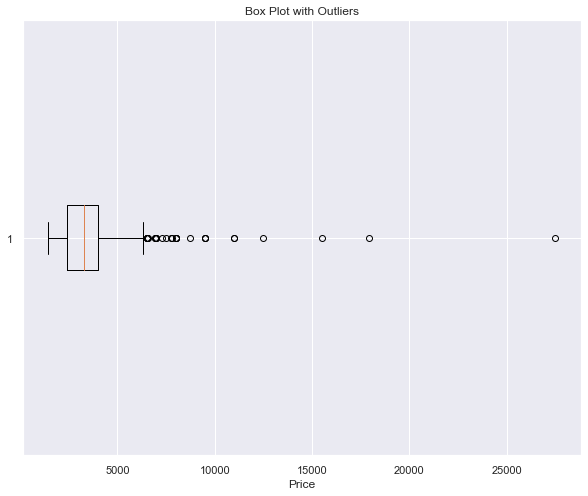

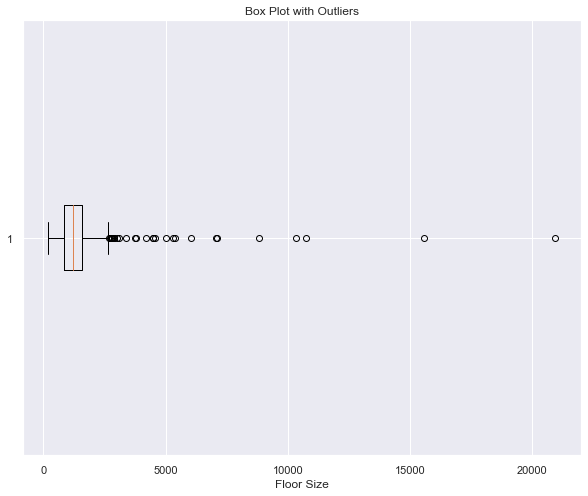

In [11]:
# Boxplot to check outliers for Price
plt.boxplot(new_data['corrected_price'],vert=False) #function boxplot returns to a dictionary, contains the following keys. 
plt.title("Box Plot with Outliers")
plt.xlabel("Price")
plt.show()

# Boxplot to check outliers for Floor Size
plt.boxplot(new_data['new_floor_size'],vert=False) #function boxplot returns to a dictionary, contains the following keys. 
plt.title("Box Plot with Outliers")
plt.xlabel("Floor Size")
plt.show()

In [12]:
# Finding Outliers in Price and Removing it
def find_outliers_price(a):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(a)
    random_data_mean = np.mean(a)
    anomaly_cut_off = random_data_std * 3
    outliers_list=[]
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in a:
        if outlier > upper_limit or outlier < lower_limit:
            outliers_list.append(outlier)
    return outliers_list

# running the function multiple times to remove the outliers
i = 0 
while i < 5:
    a=new_data['corrected_price']
    outliers_list=find_outliers_price(a)
    for x in outliers_list:
        indexNames = new_data[ new_data['corrected_price'] == x].index
        new_data=new_data.drop(indexNames)
    i+= 1
# After removing outliers length of new_data
len(new_data)

535

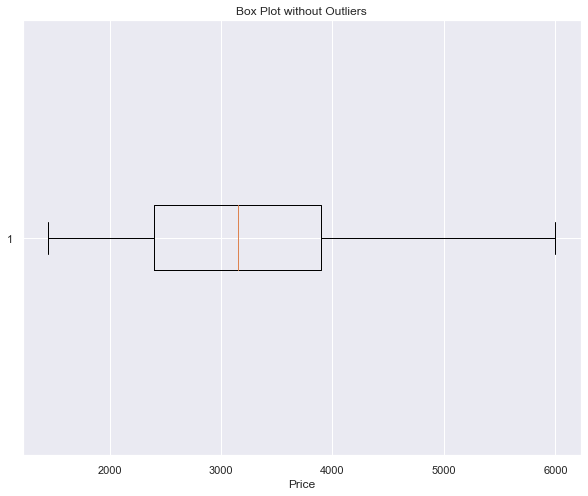

In [13]:
plt.boxplot(new_data['corrected_price'],vert=False) #function boxplot returns to a dictionary, contains the following keys. 
plt.title("Box Plot without Outliers")
plt.xlabel("Price")
plt.show()



In [14]:
def find_outliers_floor(b):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(b)
    random_data_mean = np.mean(b)
    anomaly_cut_off = random_data_std * 3
    outliers_list_floor=[]
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    # Generate outliers
    for outlier in b:
        if outlier > upper_limit or outlier < lower_limit:
            outliers_list.append(outlier)
    return outliers_list


# running the function multiple times to remove the outliers
i = 0 
while i < 3 :
    b=new_data['new_floor_size']
    outliers_list_floor=find_outliers_floor(b)
    for y in outliers_list:
        indexNames = new_data[ new_data['new_floor_size'] == y ].index
        new_data=new_data.drop(indexNames)
    i+= 1
len(new_data)

517

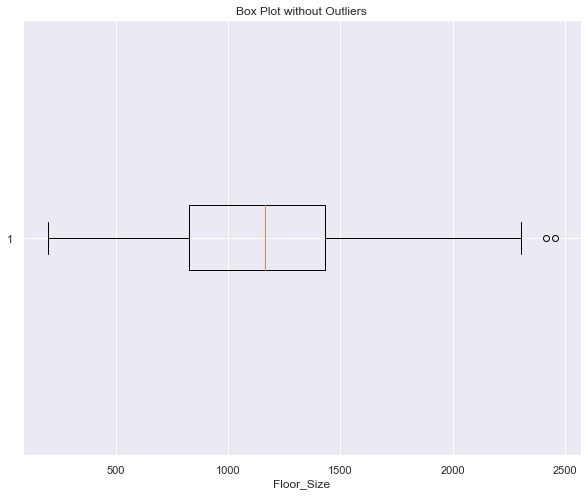

In [15]:
plt.boxplot(new_data['new_floor_size'],vert=False) #function boxplot returns to a dictionary, contains the following keys. 
plt.title("Box Plot without Outliers")
plt.xlabel("Floor_Size")
plt.show()

In [16]:
# Preprocessed Data to CSV
new_data.to_csv('Preprocessed_Data.csv',index=False,header=True) 

# Linear Regression

In [17]:
# Splitting the data into two sets(Training 60%, Validation 40%)
import random
# Training
random.seed()
training=new_data.sample(frac=0.6, random_state = 2)
training

,name,street,city,state,postalCode,property_type,url,corrected_price,beds,bath,new_floor_size,listed_days,ppsf
86,"38891 Fremont Blvd Apt 5, Fremont, CA 94536",38891 Fremont Blvd APT 5,Fremont,CA,94536,Apartment for rent,https://www.zillow.com/homedetails/38891-Fremo...,2350.0,2,1,768.0,33.0,3.059896
514,"4171 Byron St, Palo Alto, CA 94306",4171 Byron St,Palo Alto,CA,94306,Apartment for rent,https://www.zillow.com/homedetails/4171-Byron-...,2400.0,1,1,700.0,1.0,3.428571
379,"3510 Pyramid Way, Mountain View, CA 94043",3510 Pyramid Way,Mountain View,CA,94043,House for rent,https://www.zillow.com/homedetails/3510-Pyrami...,4500.0,3,3,1776.0,89.0,2.533784
398,"775 S Shoreline Blvd Apt 2, Mountain View, CA ...",775 S Shoreline Blvd APT 2,Mountain View,CA,94041,Apartment for rent,https://www.zillow.com/homedetails/775-S-Shore...,2250.0,1,1,600.0,1.0,3.750000
78,"48263 Arcadian St, Fremont, CA 94539",48263 Arcadian St,Fremont,CA,94539,House for rent,https://www.zillow.com/homedetails/48263-Arcad...,3449.0,3,2,1234.0,31.0,2.794976
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,"4214 Marston Ln, Santa Clara, CA 95054",4214 Marston Ln,Santa Clara,CA,95054,House for rent,https://www.zillow.com/homedetails/4214-Marsto...,4600.0,4,5,2083.0,65.0,2.208353
104,"3587 Agate Dr #214, Santa Clara, CA 95051",3587 Agate Dr #214,Santa Clara,CA,95051,Apartment for rent,https://www.zillow.com/homedetails/3587-Agate-...,3690.0,2,2,1050.0,83.0,3.514286
374,"529d Thompson Ave #d, Mountain View, CA 94043",529D Thompson Ave #D,Mountain View,CA,94043,Apartment for rent,https://www.zillow.com/homedetails/529D-Thomps...,2490.0,2,1,1000.0,85.0,2.490000
5,"4141 Deep Creek Rd Spc 50, Fremont, CA 94555",4141 Deep Creek Rd SPC 50,Fremont,CA,94555,Apartment for rent,https://www.zillow.com/homedetails/4141-Deep-C...,2350.0,2,1,900.0,1.0,2.611111


In [18]:
#Validation
tc1=pd.concat([new_data,training])
validation=tc1.drop_duplicates(keep=False)
validation

,name,street,city,state,postalCode,property_type,url,corrected_price,beds,bath,new_floor_size,listed_days,ppsf
0,"39507 Ross Cmn, Fremont, CA 94538",39507 Ross Cmn,Fremont,CA,94538,Apartment for rent,https://www.zillow.com/homedetails/39507-Ross-...,2345.0,2,2,900.0,1.0,2.605556
8,"4851 Deadwood Dr, Fremont, CA 94536",4851 Deadwood Dr,Fremont,CA,94536,House for rent,https://www.zillow.com/homedetails/4851-Deadwo...,3300.0,3,2,1380.0,1.0,2.391304
9,"37402 Sequoia Rd, Fremont, CA 94536",37402 Sequoia Rd,Fremont,CA,94536,Townhouse for rent,https://www.zillow.com/homedetails/37402-Sequo...,3950.0,3,3,1652.0,1.0,2.391041
16,"39700 Banyan Tree Rd, Fremont, CA 94538",39700 Banyan Tree Rd,Fremont,CA,94538,House for rent,https://www.zillow.com/homedetails/39700-Banya...,3500.0,3,2,1200.0,2.0,2.916667
19,"3637 Fitzsimmons Cmn, Fremont, CA 94538",3637 Fitzsimmons Cmn,Fremont,CA,94538,House for rent,https://www.zillow.com/homedetails/3637-Fitzsi...,3195.0,2,5,1309.0,2.0,2.440794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,"552 Georgia Ave, Palo Alto, CA 94306",552 Georgia Ave,Palo Alto,CA,94306,Apartment for rent,https://www.zillow.com/homedetails/552-Georgia...,1695.0,1,1,350.0,10.0,4.842857
559,"235 Scripps Ct, Palo Alto, CA 94306",235 Scripps Ct,Palo Alto,CA,94306,House for rent,https://www.zillow.com/homedetails/235-Scripps...,3995.0,2,2,900.0,11.0,4.438889
560,"460 Everett Ave Apt 4, Palo Alto, CA 94301",460 Everett Ave APT 4,Palo Alto,CA,94301,Apartment for rent,https://www.zillow.com/homedetails/460-Everett...,2495.0,1,1,620.0,11.0,4.024194
561,"837 Wintergreen Way, Palo Alto, CA 94303",837 Wintergreen Way,Palo Alto,CA,94303,House for rent,https://www.zillow.com/homedetails/837-Winterg...,5500.0,3,2,1800.0,11.0,3.055556


# Linear Regression Using Stats Method 

In [19]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

# Developing Model 1
est=sm.ols(formula='corrected_price ~ new_floor_size + beds',data=training)

# Fits the regression equation
model1=est.fit()
print(model1.summary())

# Checking the coefficients 
model1.params

                            OLS Regression Results                            
Dep. Variable:        corrected_price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     211.2
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           2.01e-58
Time:                        16:21:48   Log-Likelihood:                -2445.3
No. Observations:                 310   AIC:                             4897.
Df Residuals:                     307   BIC:                             4908.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1275.9557    103.755     12.

Intercept         1275.955655
new_floor_size       0.666426
beds               534.912785
dtype: float64

In [20]:
# Predictions
pred1 = model1.predict(validation)

# Changing to Array

pred1= pred1.to_numpy()
pred1

# Actual Value

Actual1 = validation['corrected_price'].values.copy()
Actual1

array([2345., 3300., 3950., 3500., 3195., 3200., 3500., 2350., 3995.,
       2750., 2350., 4000., 2700., 2500., 2995., 1995., 1895., 2500.,
       2200., 2950., 2700., 2600., 3200., 2575., 3300., 3500., 3390.,
       3600., 2600., 2900., 4295., 3195., 3400., 2399., 3200., 3590.,
       2300., 3850., 3000., 2000., 1850., 3650., 1895., 3395., 2995.,
       2025., 2350., 4250., 1900., 2500., 3500., 3400., 5950., 3900.,
       4300., 1950., 3700., 2000., 1792., 3695., 3600., 2050., 2100.,
       3500., 1945., 3200., 2950., 3950., 2700., 3500., 3300., 3600.,
       3950., 2275., 4195., 2850., 2950., 3900., 3595., 2550., 4500.,
       3400., 3350., 2295., 4900., 2335., 2400., 1900., 4600., 2395.,
       2350., 2495., 4000., 1700., 2075., 4750., 2695., 3250., 2600.,
       1995., 3000., 2050., 4000., 3600., 2300., 3700., 1750., 2895.,
       3300., 3400., 2150., 1795., 1800., 1900., 3295., 4100., 2395.,
       4750., 2350., 3800., 3200., 3695., 2800., 4000., 3290., 2700.,
       3300., 4300.,

In [21]:
# Checking Residuals for model1
residual1 = Actual1 - pred1
residual1

array([ -600.5643839 ,  -500.36152008,   -31.62931918,  -180.40488832,
         -23.13250829,  -455.74713623,  -504.28779407,   -40.65882713,
        -899.40549404,  -545.04398357,  -945.04398357,  -204.8819394 ,
        -848.45259338,  -345.6005241 ,  -925.31815184,  -315.68773929,
        -315.72387949,  -567.52029286,  -706.91169145,  -834.36730251,
       -1914.27960862, -1080.40488832,  -421.7594239 ,  -399.88711611,
        -513.02360899, -1283.1123968 ,  -656.93904092, -1101.80845749,
        -364.2243044 ,   -83.55065063,  -622.73039466,  -458.74785904,
        -491.66184536,  -574.55426465,  -413.76231512, -1750.6836565 ,
        -605.57883998, -1366.72847035,  -845.01204412,  -244.04516609,
        -322.07118703,  -326.96433906,  -382.36645269,  -285.40488832,
         -83.8495303 ,  -937.2250272 ,  -662.2069571 ,   309.6890762 ,
        -204.09576237,  -512.2069571 ,  -868.59559149,  -307.0619176 ,
        1925.71943397,   -46.97518112,  -248.53053913,  -234.06685021,
      

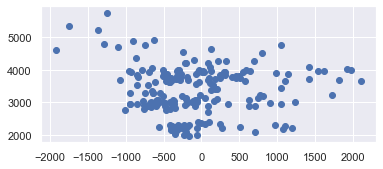

In [22]:
# Plotting the Residuals for model 1
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual1, pred1)

In [23]:
# Pre - Covid dataset
pre_covid = new_data[new_data['listed_days'] > 180]
pre_covid.head()

# Post - Covid dataset
post_covid = new_data[new_data['listed_days'] < 180]
post_covid.head()

,name,street,city,state,postalCode,property_type,url,corrected_price,beds,bath,new_floor_size,listed_days,ppsf
0,"39507 Ross Cmn, Fremont, CA 94538",39507 Ross Cmn,Fremont,CA,94538,Apartment for rent,https://www.zillow.com/homedetails/39507-Ross-...,2345.0,2,2,900.0,1.0,2.605556
1,"40660 Fremont Blvd, Fremont, CA 94538",40660 Fremont Blvd,Fremont,CA,94538,House for rent,https://www.zillow.com/homedetails/40660-Fremo...,3990.0,3,3,2126.0,1.0,1.876764
2,"33208 Lake Superior Ct, Fremont, CA 94555",33208 Lake Superior Ct,Fremont,CA,94555,House for rent,https://www.zillow.com/homedetails/33208-Lake-...,3500.0,3,2,1594.0,1.0,2.195734
3,"3658 Capitol Ave #316a, Fremont, CA 94538",3658 Capitol Ave #316A,Fremont,CA,94538,Apartment for rent,https://www.zillow.com/homedetails/3658-Capito...,3650.0,2,5,1350.0,1.0,2.703704
4,"41496 Timber Creek Ter, Fremont, CA 94539",41496 Timber Creek Ter,Fremont,CA,94539,Townhouse for rent,https://www.zillow.com/homedetails/41496-Timbe...,3350.0,3,5,1620.0,1.0,2.067901


---

<h1> Piechart - Cheapest City </h1>

In [24]:
# Extracting list of distinct city names
cities = []
for x in new_data['city']:
    if x not in cities:
        cities.append(x)
cities.sort()
print(cities)

['Fremont', 'Mountain View', 'Palo Alto', 'Santa Clara', 'Sunnyvale']


In [25]:
# Extracting Price/SqFt Pre-Covid and Post-Covid
print("Lowest Price/Sqft\n")

# Pre- Covid Price/SqFt
pre_covid_price = []
pre_covid_price = pre_covid.groupby(['city'])['ppsf'].min()
pre_covid_price = pre_covid_price.sort_index()
pre_covid_price = pre_covid_price.tolist()
print("Fremont, Mountain View, Palo Alto, Santa Clara, Sunnyvale")
print(pre_covid_price)

# Post - Covid Price/SqFt
post_covid_price = []
post_covid_price = post_covid.groupby(['city'])['ppsf'].min()
post_covid_price = post_covid_price.sort_index()
post_covid_price = post_covid_price.tolist()
print("\nFremont, Mountain View, Palo Alto, Santa Clara, Sunnyvale")
print(post_covid_price)

Lowest Price/Sqft

Fremont, Mountain View, Palo Alto, Santa Clara, Sunnyvale
[2.1666666666666665, 2.0995, 1.804257162691888, 4.7, 2.1638888888888888]

Fremont, Mountain View, Palo Alto, Santa Clara, Sunnyvale
[1.5, 1.1697048611111112, 1.1583752211835079, 1.4567445963368357, 1.3689888977623275]


In [26]:
colors = ['orange', 'red', 'blue', 'yellow', 'green']

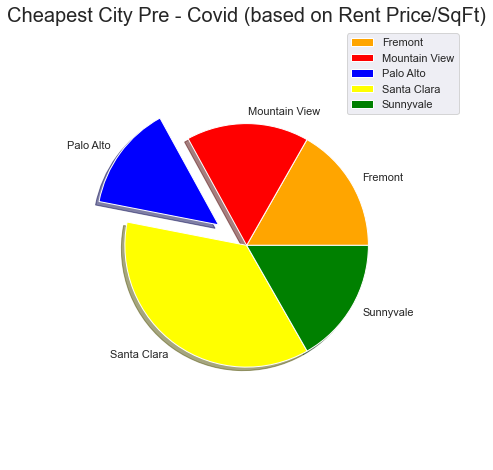

In [27]:
plt.pie(pre_covid_price, labels = cities, explode = (0, 0, 0.2, 0, 0), shadow = True, radius = 0.7, colors = colors);
plt.title("Cheapest City Pre - Covid (based on Rent Price/SqFt)", fontsize = 20);
plt.legend()
plt.show()

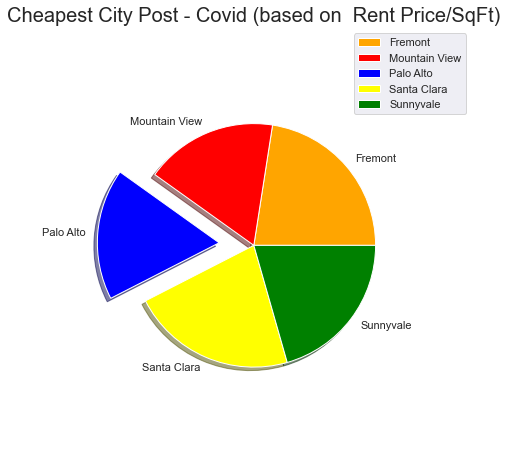

In [28]:
plt.pie(post_covid_price, labels = cities, explode = (0, 0, 0.2, 0, 0), shadow = True, radius = 0.7, colors = colors);
plt.title("Cheapest City Post - Covid (based on  Rent Price/SqFt)", fontsize = 20);
plt.legend()
plt.show()

---

In [29]:
pre_covid_city = pre_covid.groupby('city', as_index = False)['corrected_price'].mean()
pre_covid_city.rename(columns= {'corrected_price': 'price_pre_covid'}, inplace = True)
pre_covid_city

,city,price_pre_covid
0,Fremont,2612.5
1,Mountain View,2640.0
2,Palo Alto,3265.0
3,Santa Clara,3290.0
4,Sunnyvale,3805.0


In [30]:
post_covid_city = post_covid.groupby('city', as_index = False)['corrected_price'].mean()
post_covid_city.rename(columns= {'corrected_price': 'price_post_covid'}, inplace = True)
post_covid_city

,city,price_post_covid
0,Fremont,3063.661691
1,Mountain View,3431.971448
2,Palo Alto,3612.025210
3,Santa Clara,3015.230326
4,Sunnyvale,3116.798676


In [31]:
merged_df = pd.merge(pre_covid_city, post_covid_city, on = 'city', how = 'inner')
merged_df['appreciation rate'] = ((merged_df['price_post_covid'] - merged_df['price_pre_covid'])*100 ) /  merged_df['price_pre_covid']
merged_df.head()

,city,price_pre_covid,price_post_covid,appreciation rate
0,Fremont,2612.5,3063.661691,17.269347
1,Mountain View,2640.0,3431.971448,29.998918
2,Palo Alto,3265.0,3612.025210,10.628644
3,Santa Clara,3290.0,3015.230326,-8.351662
4,Sunnyvale,3805.0,3116.798676,-18.086763


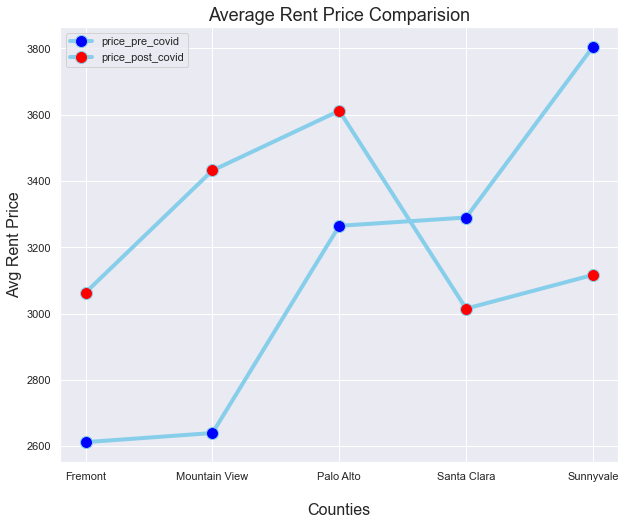

In [32]:
plt.plot('city', 'price_pre_covid', data=pre_covid_city, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4)
plt.plot('city', 'price_post_covid', data=post_covid_city, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4)
plt.xlabel("\nCounties", fontsize =16)
plt.ylabel("Avg Rent Price",fontsize =16)
plt.title("Average Rent Price Comparision", fontsize = 18)
plt.legend()
plt.show()

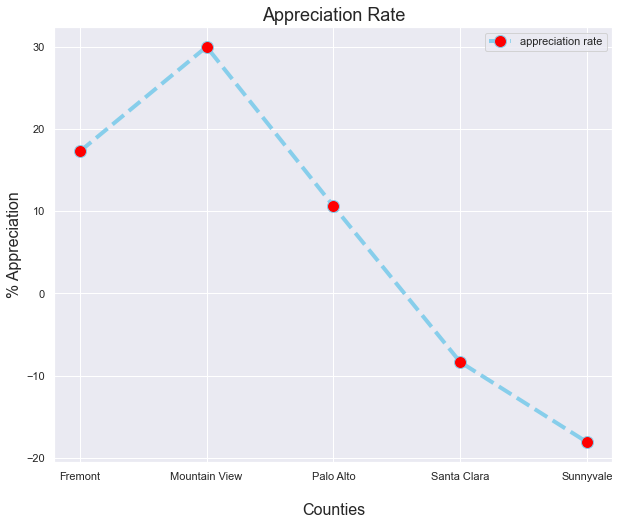

In [33]:
plt.plot('city', 'appreciation rate', data=merged_df, marker='o', markerfacecolor='red', 
         markersize=12, color='skyblue', linewidth=4,  linestyle='--')
plt.xlabel("\nCounties", fontsize =16)
plt.ylabel("% Appreciation",fontsize =16)
plt.title("Appreciation Rate", fontsize = 18)
plt.legend()
plt.show()

In [34]:
####  Rent Vs Floorsize Comparison
##  Dataset creation
FremontFloorSize_mean=new_data.loc[new_data["city"]== 'Fremont',"new_floor_size"].mean()
FremontRent_mean = new_data.loc[new_data["city"]== 'Fremont',"ppsf"].mean()
SunnyvaleFloorSize_mean=new_data.loc[new_data["city"]== 'Sunnyvale',"new_floor_size"].mean()
SunnyvaleRent_mean = new_data.loc[new_data["city"]== 'Sunnyvale',"ppsf"].mean()
SantaClaraFloorSize_mean=new_data.loc[new_data["city"]== 'Santa Clara',"new_floor_size"].mean()
SantaClaraRent_mean = new_data.loc[new_data["city"]== 'Santa Clara',"ppsf"].mean()
MountainViewFloorSize_mean=new_data.loc[new_data["city"]== 'Mountain View',"new_floor_size"].mean()
MountainViewRent_mean = new_data.loc[new_data["city"]== 'Mountain View',"ppsf"].mean()
PaloAltoFloorSize_mean=new_data.loc[new_data["city"]== 'Palo Alto',"new_floor_size"].mean()
PaloAltoRent_mean = new_data.loc[new_data["city"]== 'Palo Alto',"ppsf"].mean()

## Getting City wise avg Rent
FremontRent= FremontFloorSize_mean * FremontRent_mean
SunnyvaleRent = SunnyvaleFloorSize_mean* SunnyvaleRent_mean
SantaClaraRent = SantaClaraFloorSize_mean * SantaClaraRent_mean
MountainViewRent = MountainViewFloorSize_mean *MountainViewRent_mean
PaloAltoRent= PaloAltoFloorSize_mean*PaloAltoRent_mean

## creating List of Avg Rent, Avg Floor size & City
FloorSize_list=[FremontFloorSize_mean,SunnyvaleFloorSize_mean,SantaClaraFloorSize_mean,MountainViewFloorSize_mean,PaloAltoFloorSize_mean]
Rent_list=[FremontRent,SunnyvaleRent,SantaClaraRent,MountainViewRent,PaloAltoRent]
City =["Fremont","Sunnyvale","Santa Clara","Mountain View","Palo Alto"]

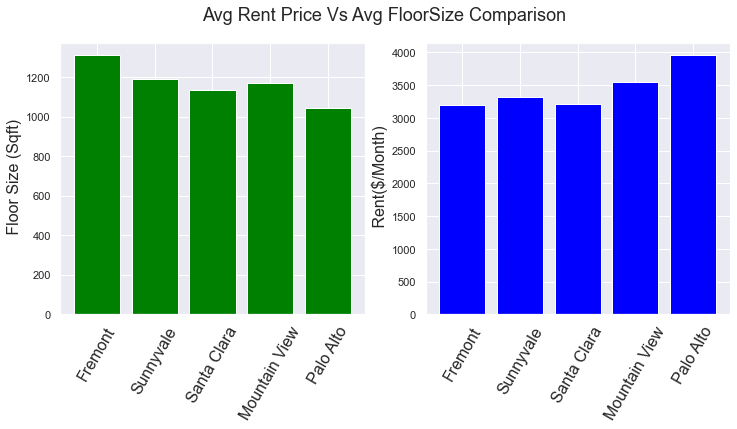

In [35]:
### plotting  Bar graph of Rent & Floor Size
fig, axs = plt.subplots(1, 2, figsize=(12,5))
axs[0].bar(City, FloorSize_list , facecolor = 'green')
axs[0].set_xticklabels(City, rotation=60, fontsize = 16)
axs[0].set_ylabel(" Floor Size (Sqft)", fontsize = 16)
axs[1].bar(City, Rent_list , facecolor = 'blue')
axs[1].set_xticklabels(City, rotation=60, fontsize = 16)
axs[1].set_ylabel(" Rent($/Month)", fontsize = 16)
fig.suptitle('Avg Rent Price Vs Avg FloorSize Comparison', fontsize = 18)
plt.show()

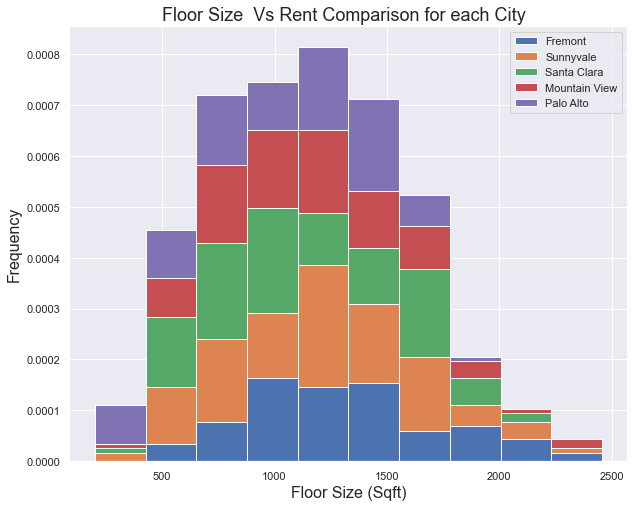

In [36]:
### Histogram for floorsize (Citywise)

plt.figure()
FremontData = new_data.loc[new_data["city"]== 'Fremont',"new_floor_size"]
SunnyvaleData=new_data.loc[new_data["city"]== 'Sunnyvale',"new_floor_size"]
SantaClaraData=new_data.loc[new_data["city"]== 'Santa Clara',"new_floor_size"]
MountainViewData=new_data.loc[new_data["city"]== 'Mountain View',"new_floor_size"]
PaloAltoData=new_data.loc[new_data["city"]== 'Palo Alto',"new_floor_size"]

FloorList = [FremontData,SunnyvaleData,SantaClaraData,MountainViewData,PaloAltoData]

bins = 10
plt.hist(FloorList,bins,density = 1,label = City, stacked = True)
plt.xlabel("Floor Size (Sqft)",fontsize = 16)
plt.ylabel("Frequency",fontsize =16)
plt.title("Floor Size  Vs Rent Comparison for each City  ", fontsize = 18)
plt.legend()
plt.show()

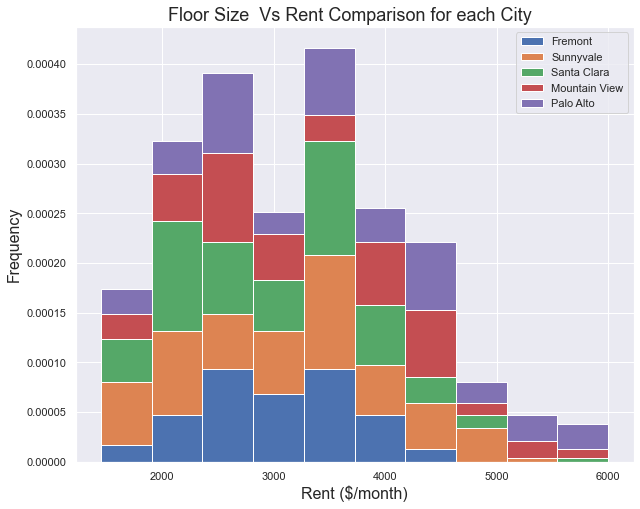

In [37]:
### Histogram for Rent (Citywise)
plt.figure()
FRent = new_data.loc[new_data["city"]== 'Fremont',"new_floor_size"]*new_data.loc[new_data["city"]== 'Fremont',"ppsf"]
SuRent=new_data.loc[new_data["city"]== 'Sunnyvale',"new_floor_size"]*new_data.loc[new_data["city"]== 'Sunnyvale',"ppsf"]
SanRent=new_data.loc[new_data["city"]== 'Santa Clara',"new_floor_size"]*new_data.loc[new_data["city"]== 'Santa Clara',"ppsf"]
MVRent=new_data.loc[new_data["city"]== 'Mountain View',"new_floor_size"]*new_data.loc[new_data["city"]== 'Mountain View',"ppsf"]
PARent=new_data.loc[new_data["city"]== 'Palo Alto',"new_floor_size"]*new_data.loc[new_data["city"]== 'Palo Alto',"ppsf"]

RList = [FRent,SuRent,SanRent,MVRent,PARent]

bins = 10
plt.hist(RList,bins,density = 1,label = City, stacked = True)
plt.xlabel("Rent ($/month)", fontsize = 16)
plt.ylabel("Frequency", fontsize =16)
plt.title("Floor Size  Vs Rent Comparison for each City  ", fontsize = 18)
plt.legend()
plt.show()

### Scatter Plot

In [38]:
#Processed for few sqft
pre_covid_rent_less_5000=pre_covid[pre_covid['corrected_price']<5000]
pre_covid_rent_rent_floor=pre_covid_rent_less_5000[pre_covid_rent_less_5000['new_floor_size']<2000]

post_covid_rent_less_5000=post_covid[post_covid['corrected_price']<5000]
post_covid_rent_rent_floor=post_covid_rent_less_5000[post_covid_rent_less_5000['new_floor_size']<2000]

In [39]:
post_covid_rent_rent_floor=post_covid_rent_rent_floor[::2]
post_covid_rent_rent_floor=post_covid_rent_rent_floor[::2]
post_covid_rent_rent_floor=post_covid_rent_rent_floor[::2]
df2= post_covid.sort_values('corrected_price',ascending=True, inplace=False, kind='quicksort')[:-65]
df3 = df2.sort_values('new_floor_size',ascending=True, inplace=False, kind='quicksort')[:-55]
df4=df3.iloc[::2]
df5=df4.iloc[::2]
df6=df5.iloc[::2]

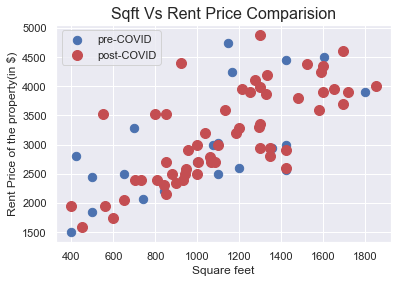

In [40]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(pre_covid_rent_rent_floor['new_floor_size'],pre_covid_rent_rent_floor['corrected_price'],s=70, facecolors='b', edgecolors='b',label="pre-COVID")
ax.scatter(post_covid_rent_rent_floor['new_floor_size'],post_covid_rent_rent_floor['corrected_price'],s=100,facecolors='r', edgecolors='r',label='post-COVID')
ax.set_xlabel("Square feet")
ax.set_ylabel("Rent Price of the property(in $)")
ax.set_title("Sqft Vs Rent Price Comparision" , fontsize = 16)
ax.legend()
plt.show()

In [41]:
### Price comparison on basis of No of beds

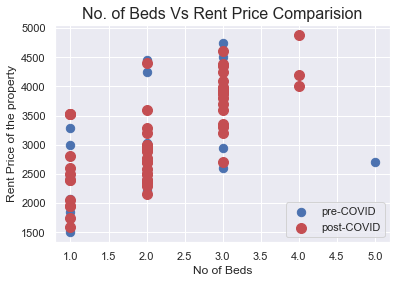

In [42]:
fig, ax = plt.subplots(figsize=(6,4))

ax.scatter(pre_covid_rent_rent_floor['beds'],pre_covid_rent_rent_floor['corrected_price'],s=70, facecolors='b', edgecolors='b',label="pre-COVID")
ax.scatter(post_covid_rent_rent_floor['beds'],post_covid_rent_rent_floor['corrected_price'],s=100,facecolors='r', edgecolors='r',label='post-COVID')
ax.set_xlabel("No of Beds")
ax.set_ylabel("Rent Price of the property")
ax.set_title("No. of Beds Vs Rent Price Comparision" , fontsize = 16)
ax.legend()
plt.show()

In [43]:
###Histrogram
###Fremont Pre-Covid
pre_fremont_2=pre_covid[(pre_covid['city']=='Fremont')& (pre_covid['beds']==2)]
pre_rent_fremont_2=pre_fremont_2['corrected_price'].mean()
pre_rent_fremont_2

##3 bed
pre_fremont_3=pre_covid[(pre_covid['city']=='Fremont')& (pre_covid['beds']==3)]
pre_rent_fremont_3=pre_fremont_3['corrected_price'].mean()
pre_rent_fremont_3

##5 bed
pre_fremont_5=pre_covid[(pre_covid['city']=='Fremont')& (pre_covid['beds']==5)]
pre_rent_fremont_5=pre_fremont_5['corrected_price'].mean()
pre_rent_fremont_5

dff_fremont_pre=pd.DataFrame({'Beds':['Two','Three','Five'],
                   'AverageRent':[pre_rent_fremont_2,pre_rent_fremont_3,pre_rent_fremont_5]})
dff_fremont_pre.head()


,Beds,AverageRent
0,Two,2200.0
1,Three,2775.0
2,Five,2700.0


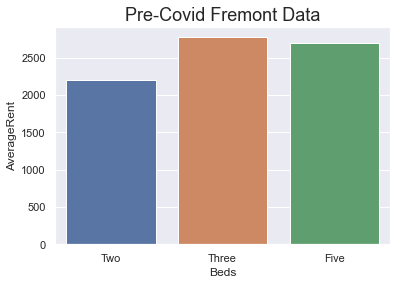

In [44]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_fremont_pre)
plt.title('Pre-Covid Fremont Data', fontsize=18)
plt.show()

In [45]:
## Fremont Post-Covid
post_fremont_2=post_covid[(post_covid['city']=='Fremont')& (post_covid['beds']==2)]
post_rent_fremont_2=post_fremont_2['corrected_price'].mean()
post_rent_fremont_2

##3 bed
post_fremont_3=post_covid[(post_covid['city']=='Fremont')& (post_covid['beds']==3)]
post_rent_fremont_3=post_fremont_3['corrected_price'].mean()
post_rent_fremont_3

##5 bed
post_fremont_5=post_covid[(post_covid['city']=='Fremont')& (post_covid['beds']==5)]
post_rent_fremont_5=post_fremont_5['corrected_price'].mean()
post_rent_fremont_5

dff_fremont_post=pd.DataFrame({'Beds':['Two','Three','Five'],
                   'AverageRent':[post_rent_fremont_2,post_rent_fremont_3,post_rent_fremont_5]})
dff_fremont_post.head()

,Beds,AverageRent
0,Two,2638.642857
1,Three,3379.542857
2,Five,3720.000000


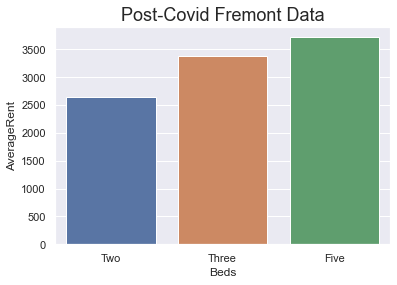

In [46]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_fremont_post)
plt.title('Post-Covid Fremont Data', fontsize=18)
plt.show()

In [47]:
## Sunnyvale Pre-Covid
pre_Sunnyvale_1=pre_covid[(pre_covid['city']=='Sunnyvale')& (pre_covid['beds']==1)]
pre_rent_Sunnyvale_1=pre_Sunnyvale_1['corrected_price'].mean()
pre_rent_Sunnyvale_1

##3 bed
pre_Sunnyvale_3=pre_covid[(pre_covid['city']=='Sunnyvale')& (pre_covid['beds']==3)]
pre_rent_Sunnyvale_3=pre_Sunnyvale_3['corrected_price'].mean()
pre_rent_Sunnyvale_3

dff_Sunnyvale_pre=pd.DataFrame({'Beds':['One','Three'],
                   'AverageRent':[pre_rent_Sunnyvale_1,pre_rent_Sunnyvale_3]})
dff_Sunnyvale_pre.head()


,Beds,AverageRent
0,One,2075.000000
1,Three,4381.666667


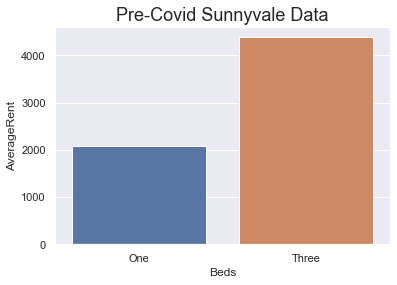

In [48]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_Sunnyvale_pre)
plt.title('Pre-Covid Sunnyvale Data', fontsize=18)
plt.show()

In [49]:
## Sunnyvale post-Covid
post_Sunnyvale_1=post_covid[(post_covid['city']=='Sunnyvale')& (post_covid['beds']==1)]
post_rent_Sunnyvale_1=post_Sunnyvale_1['corrected_price'].mean()
post_rent_Sunnyvale_1

##3 bed
post_Sunnyvale_3=post_covid[(post_covid['city']=='Sunnyvale')& (post_covid['beds']==3)]
post_rent_Sunnyvale_3=post_Sunnyvale_3['corrected_price'].mean()
post_rent_Sunnyvale_3

dff_Sunnyvale_post=pd.DataFrame({'Beds':['One','Three'],
                   'AverageRent':[post_rent_Sunnyvale_1,post_rent_Sunnyvale_3]})
dff_Sunnyvale_post.head()


,Beds,AverageRent
0,One,2020.268286
1,Three,3708.372093


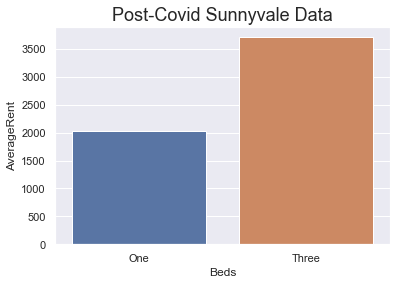

In [50]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_Sunnyvale_post)
plt.title('Post-Covid Sunnyvale Data', fontsize=18)
plt.show()

In [51]:
## MountainView Pre-Covid
pre_MountainView_1=pre_covid[(pre_covid['city']=='Mountain View')& (pre_covid['beds']==1)]
pre_rent_MountainView_1=pre_MountainView_1['corrected_price'].mean()
pre_rent_MountainView_1

##2 bed
pre_MountainView_2=pre_covid[(pre_covid['city']=='Mountain View')& (pre_covid['beds']==2)]
pre_rent_MountainView_2=pre_MountainView_2['corrected_price'].mean()
pre_rent_MountainView_2

##3 bed
pre_MountainView_3=pre_covid[(pre_covid['city']=='Mountain View')& (pre_covid['beds']==3)]
pre_rent_MountainView_3=pre_MountainView_3['corrected_price'].mean()
pre_rent_MountainView_3

dff_MountainView_pre=pd.DataFrame({'Beds':['One','Two','Three'],
                   'AverageRent':[pre_rent_MountainView_1,pre_rent_MountainView_2,pre_rent_MountainView_3]})
dff_MountainView_pre.head()

,Beds,AverageRent
0,One,2199.0
1,Two,2742.5
2,Three,4199.0


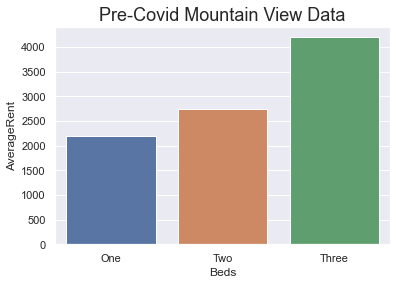

In [52]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_MountainView_pre)
plt.title('Pre-Covid Mountain View Data', fontsize=18)
plt.show()

In [53]:
## MountainView post-Covid
post_MountainView_1=post_covid[(post_covid['city']=='Mountain View')& (post_covid['beds']==1)]
post_rent_MountainView_1=post_MountainView_1['corrected_price'].mean()
post_rent_MountainView_1

##2 bed
post_MountainView_2=post_covid[(post_covid['city']=='Mountain View')& (post_covid['beds']==2)]
post_rent_MountainView_2=post_MountainView_2['corrected_price'].mean()
post_rent_MountainView_2

##3 bed
post_MountainView_3=post_covid[(post_covid['city']=='Mountain View')& (post_covid['beds']==3)]
post_rent_MountainView_3=post_MountainView_3['corrected_price'].mean()
post_rent_MountainView_3

dff_MountainView_post=pd.DataFrame({'Beds':['One','Two','Three'],
                   'AverageRent':[post_rent_MountainView_1,post_rent_MountainView_2,post_rent_MountainView_3]})
dff_MountainView_post.head()

,Beds,AverageRent
0,One,2306.056533
1,Two,3138.820116
2,Three,4395.090909


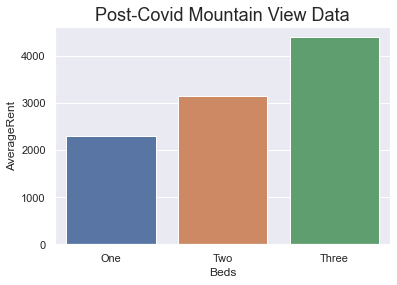

In [54]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_MountainView_post)
plt.title('Post-Covid Mountain View Data', fontsize=18)
plt.show()

In [55]:
## PaloAlto Pre-Covid
pre_PaloAlto_1=pre_covid[(pre_covid['city']=='Palo Alto')& (pre_covid['beds']==1)]
pre_rent_PaloAlto_1=pre_PaloAlto_1['corrected_price'].mean()
pre_rent_PaloAlto_1

##2 bed
pre_PaloAlto_2=pre_covid[(pre_covid['city']=='Palo Alto')& (pre_covid['beds']==2)]
pre_rent_PaloAlto_2=pre_PaloAlto_2['corrected_price'].mean()
pre_rent_PaloAlto_2

dff_PaloAlto_pre=pd.DataFrame({'Beds':['One','Two'],
                   'AverageRent':[pre_rent_PaloAlto_1,pre_rent_PaloAlto_2]})
dff_PaloAlto_pre.head()

,Beds,AverageRent
0,One,2800.0
1,Two,3358.0


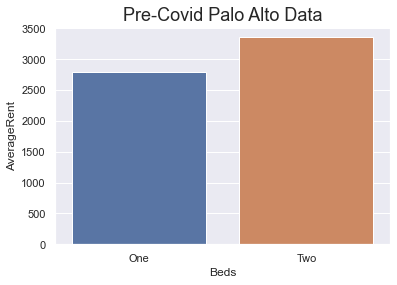

In [56]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_PaloAlto_pre)
plt.title('Pre-Covid Palo Alto Data', fontsize=18)
plt.show()

In [57]:
## PaloAlto post-Covid
post_PaloAlto_1=post_covid[(post_covid['city']=='Palo Alto')& (post_covid['beds']==1)]
post_rent_PaloAlto_1=post_PaloAlto_1['corrected_price'].mean()
post_rent_PaloAlto_1

##2 bed
post_PaloAlto_2=post_covid[(post_covid['city']=='Palo Alto')& (post_covid['beds']==2)]
post_rent_PaloAlto_2=post_PaloAlto_2['corrected_price'].mean()
post_rent_PaloAlto_2


dff_PaloAlto_post=pd.DataFrame({'Beds':['One','Two'],
                   'AverageRent':[post_rent_PaloAlto_1,post_rent_PaloAlto_2]})
dff_PaloAlto_post.head()

,Beds,AverageRent
0,One,2482.038866
1,Two,3823.333333


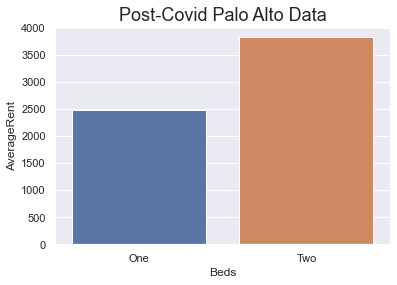

In [58]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Beds',y='AverageRent',data=dff_PaloAlto_post)
plt.title('Post-Covid Palo Alto Data', fontsize=18)
plt.show()